## Przykład: Analiza sentymentu komentarzy

Wykonaj analizę sentymentu dla każdego komentarza w pliku `train.csv` w kolumnie `comment_text`, używając narzędzia VADER z biblioteki NLTK. Następnie dodaj kolumnę z wynikiem sentymentu (pozytywny, neutralny, negatywny) i zbadaj, czy istnieje korelacja między wynikiem sentymentu a poziomem toksyczności (`target`).



In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('sample.csv')

# Inicjalizacja analizatora sentymentu
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tomec\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

# Funkcja do analizy sentymentu
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'pozytywny'
    elif sentiment_score['compound'] <= -0.05:
        return 'negatywny'
    else:
        return 'neutralny'


In [ ]:

# Analiza sentymentu dla każdego komentarza
data['sentiment'] = data['comment_text'].apply(analyze_sentiment)


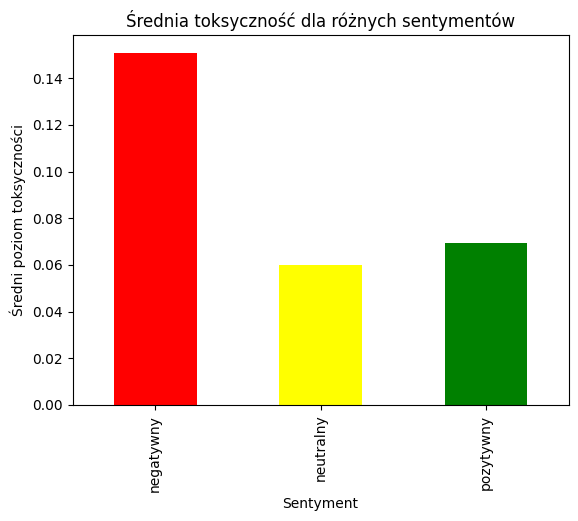

In [ ]:

# Zbadanie korelacji między sentymentem a toksycznością
sentiment_toxicity = data.groupby('sentiment')['target'].mean()

# Wykres korelacji sentymentu a toksyczności
sentiment_toxicity.plot(kind='bar', color=[ 'red', 'yellow', 'green'])
plt.title('Średnia toksyczność dla różnych sentymentów')
plt.ylabel('Średni poziom toksyczności')
plt.xlabel('Sentyment')
plt.show()


## Przykład: Analiza słownictwa w książkach

Zadaniem jest przeanalizowanie dwóch książek – "Anna Karenina" i "Jane Eyre" – pod kątem najczęściej występujących słów. Odfiltruj stop-słowa za pomocą biblioteki NLTK i porównaj słowa najczęściej pojawiające się w obu książkach.



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


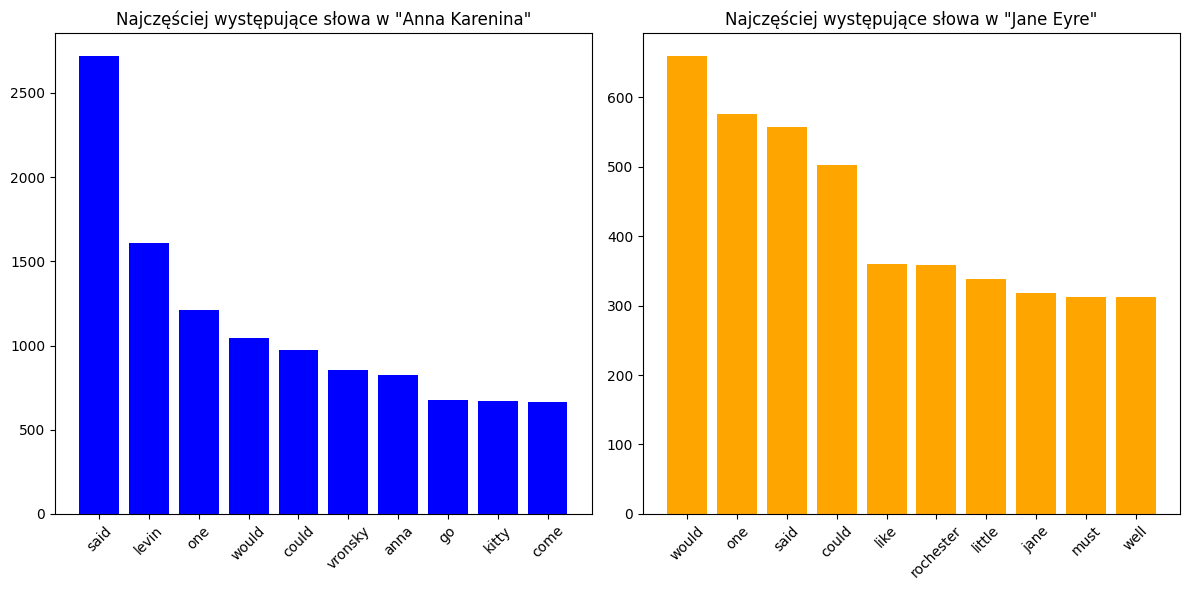

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Wczytanie danych
with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.read()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.read()

# Tokenizacja słów
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
anna_words = [word.lower() for word in word_tokenize(anna_text) if word.isalpha() and word.lower() not in stop_words]
jane_words = [word.lower() for word in word_tokenize(jane_text) if word.isalpha() and word.lower() not in stop_words]

# Częstość występowania słów
anna_freq = Counter(anna_words)
jane_freq = Counter(jane_words)

# Najczęściej występujące słowa
anna_common = anna_freq.most_common(10)
jane_common = jane_freq.most_common(10)

# Wykresy najczęściej występujących słów
anna_df = pd.DataFrame(anna_common, columns=['Word', 'Frequency'])
jane_df = pd.DataFrame(jane_common, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(anna_df['Word'], anna_df['Frequency'], color='blue')
plt.title('Najczęściej występujące słowa w "Anna Karenina"')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(jane_df['Word'], jane_df['Frequency'], color='orange')
plt.title('Najczęściej występujące słowa w "Jane Eyre"')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Zadania – Komentarze (plik `train.csv`)

### Zadanie 1: Klasyfikacja komentarzy na podstawie słów kluczowych
Stwórz klasyfikację komentarzy na podstawie słów kluczowych (neutralny, obraźliwy, atak na tożsamość). Zidentyfikuj powiązania między słowami kluczowymi a kategoriami toksyczności.

In [ ]:
def analyze_specific_sentiment(value):
    if value >= 0.6:
        return 'pozytywny'
    elif value <= 0.1:
        return 'negatywny'
    else:
        return 'neutralny'

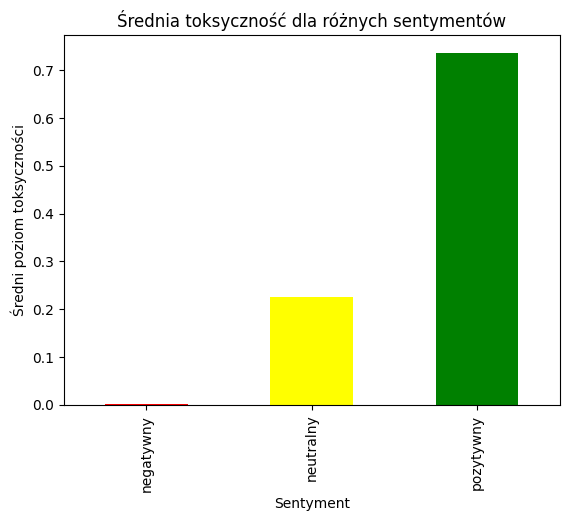

In [ ]:
# Zbadanie korelacji między sentymentem a toksycznością
data['threat_sentiment'] = data['threat'].apply(analyze_specific_sentiment)
threat_sentiment_toxicity = data.groupby('threat_sentiment')['threat'].mean()
threat_sentiment_toxicity
# Wykres korelacji sentymentu a toksyczności
threat_sentiment_toxicity.plot(kind='bar', color=[ 'red', 'yellow', 'green'])
plt.title('Średnia toksyczność dla różnych sentymentów')
plt.ylabel('Średni poziom toksyczności')
plt.xlabel('Sentyment')
plt.show()

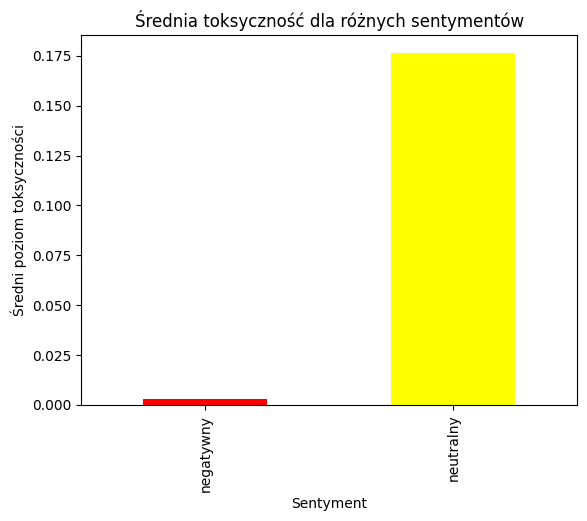

In [ ]:
# Zbadanie korelacji między sentymentem a toksycznością
data['severe_toxicity_sentiment'] = data['severe_toxicity'].apply(analyze_specific_sentiment)
severe_toxicity_sentiment_toxicity = data.groupby('severe_toxicity_sentiment')['severe_toxicity'].mean()
severe_toxicity_sentiment_toxicity
# Wykres korelacji sentymentu a toksyczności
severe_toxicity_sentiment_toxicity.plot(kind='bar', color=[ 'red', 'yellow', 'green'])
plt.title('Średnia toksyczność dla różnych sentymentów')
plt.ylabel('Średni poziom toksyczności')
plt.xlabel('Sentyment')
plt.show()

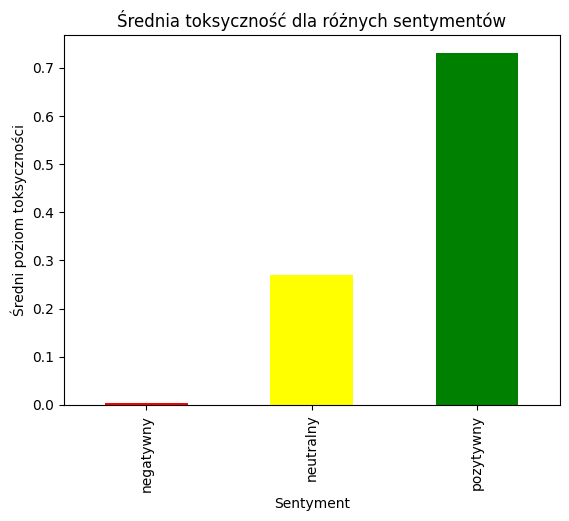

In [ ]:
# Zbadanie korelacji między sentymentem a toksycznością
data['insult_sentiment'] = data['insult'].apply(analyze_specific_sentiment)
insult_sentiment_toxicity = data.groupby('insult_sentiment')['insult'].mean()
insult_sentiment_toxicity
# Wykres korelacji sentymentu a toksyczności
insult_sentiment_toxicity.plot(kind='bar', color=[ 'red', 'yellow', 'green'])
plt.title('Średnia toksyczność dla różnych sentymentów')
plt.ylabel('Średni poziom toksyczności')
plt.xlabel('Sentyment')
plt.show()

### Zadanie 2: Analiza długości zdań i ich wpływ na toksyczność
Oblicz średnią długość zdań w komentarzach i sprawdź korelację między długością komentarza a jego toksycznością.

In [ ]:
from nltk.tokenize import sent_tokenize
import re
def zbadaj_srednia_liczbe_zdan_w_komentarzu(text):
    text = re.sub(r'\.\.+', '.', text)
    zdania = sent_tokenize(text, language='english')
    liczba_zdan = len(zdania)
    return liczba_zdan

In [ ]:
data['comment_len'] = data['comment_text'].apply(zbadaj_srednia_liczbe_zdan_w_komentarzu)
print("Średnia liczba zdań w komentarzu:", sum(data['comment_len']) / len(data['comment_text']))

Średnia liczba zdań w komentarzu: 3.6475


In [ ]:
korelacja = data['comment_len'].corr(data['target'])
print(f"Korelacja pomiędzy długościa komentarza a toksycznością: {korelacja:.2f}")

Korelacja pomiędzy długościa komentarza a toksycznością: 0.04


# Zadania – Książki (pliki `anna_karenina.txt` i `jane_eyre.txt`)

### Zadanie 3: Ekstrakcja bigramów i trigramów w obu książkach
Wyekstrahuj i porównaj bigramy i trigramy z obu książek. Zidentyfikuj charakterystyczne frazy dla każdej z książek.

In [ ]:
from nltk import ngrams
anna_bigrams = list(ngrams(anna_words, 2))
jane_bigrams = list(ngrams(jane_words, 2))
anna_trigrams = list(ngrams(anna_words, 3))
jane_trigrams = list(ngrams(jane_words, 3))

In [ ]:
anna_bigram_freq = Counter(anna_bigrams)
jane_bigram_freq2 = Counter(jane_bigrams)
anna_unique_bigrams = anna_bigram_freq - jane_bigram_freq2
print("Najczęstsze bigramy w tekście anna:", anna_bigram_freq.most_common(5))
print("Najczęstsze bigramy w tekście jane:", jane_bigram_freq2.most_common(5))
print("Charakterystyczne bigramy dla tekstu anna:", anna_unique_bigrams.most_common(5))


Najczęstsze bigramy w tekście anna: [(('alexey', 'alexandrovitch'), 570), (('stepan', 'arkadyevitch'), 547), (('sergey', 'ivanovitch'), 290), (('darya', 'alexandrovna'), 204), (('said', 'levin'), 176)]
Najczęstsze bigramy w tekście jane: [(('miss', 'temple'), 62), (('miss', 'ingram'), 54), (('miss', 'eyre'), 43), (('jane', 'eyre'), 41), (('project', 'gutenberg'), 31)]
Charakterystyczne bigramy dla tekstu anna: [(('alexey', 'alexandrovitch'), 570), (('stepan', 'arkadyevitch'), 547), (('sergey', 'ivanovitch'), 290), (('darya', 'alexandrovna'), 204), (('said', 'levin'), 176)]


In [ ]:
anna_trigram_freq = Counter(anna_trigrams)
jane_trigram_freq2 = Counter(jane_trigrams)
anna_unique_trigrams = anna_trigram_freq - jane_trigram_freq2
print("Najczęstsze trigramy w tekście anna:", anna_trigram_freq.most_common(5))
print("Najczęstsze trigramy w tekście jane:", jane_trigram_freq2.most_common(5))
print("Charakterystyczne trigramy dla tekstu anna:", anna_unique_trigrams.most_common(5))

Najczęstsze trigramy w tekście anna: [(('said', 'stepan', 'arkadyevitch'), 126), (('countess', 'lidia', 'ivanovna'), 74), (('said', 'sergey', 'ivanovitch'), 53), (('said', 'alexey', 'alexandrovitch'), 45), (('said', 'darya', 'alexandrovna'), 18)]
Najczęstsze trigramy w tekście jane: [(('project', 'gutenberg', 'literary'), 13), (('gutenberg', 'literary', 'archive'), 13), (('project', 'electronic', 'works'), 12), (('literary', 'archive', 'foundation'), 12), (('full', 'project', 'license'), 6)]
Charakterystyczne trigramy dla tekstu anna: [(('said', 'stepan', 'arkadyevitch'), 126), (('countess', 'lidia', 'ivanovna'), 74), (('said', 'sergey', 'ivanovitch'), 53), (('said', 'alexey', 'alexandrovitch'), 45), (('said', 'darya', 'alexandrovna'), 18)]


### Zadanie 4: Analiza stylu narracji na podstawie długości zdań i struktury gramatycznej
Oblicz średnią długość zdań oraz przeanalizuj struktury gramatyczne w obu książkach. Porównaj złożoność zdań i częstotliwość użycia różnych części mowy.

In [ ]:
from nltk.tokenize import sent_tokenize
anna_text = re.sub(r'\s+', ' ', anna_text) # usuwanie znaków nowej linii \n
jane_text = re.sub(r'\s+', ' ', jane_text) # usuwanie znaków nowej linii \n
anna_sentences = sent_tokenize(anna_text)
jane_sentences = sent_tokenize(jane_text)
anna_sentence_lengths = [len(sentence.split(' ')) for sentence in anna_sentences]
jane_sentence_lengths = [len(sentence.split(' ')) for sentence in jane_sentences]
anna_average_sentence_length = sum(anna_sentence_lengths) / len(anna_sentences)
jane_average_sentence_length = sum(jane_sentence_lengths) / len(jane_sentences)
print(f"Średnia długość zdań w anna: {anna_average_sentence_length:.2f} słów")
print(f"Średnia długość zdań w jane: {jane_average_sentence_length:.2f} słów")

Średnia długość zdań w anna: 20.87 słów
Średnia długość zdań w jane: 27.06 słów


### Częstotliwość częsci mowy dla Anny

In [ ]:
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
# Zliczanie części mowy
pos_tags_anna = nltk.pos_tag(anna_words)

pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags_anna)

print("\nCzęstotliwość części mowy:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tomec\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



Częstotliwość części mowy:
NN: 49104
IN: 3173
NNS: 11478
VBP: 5083
RB: 13049
JJ: 28359
MD: 3181
VB: 5384
RP: 285
VBD: 16311
VBN: 5770
VBG: 9774
NNP: 96
JJR: 552
VBZ: 1295
CD: 1935
DT: 491
UH: 136
RBR: 400
CC: 112
FW: 194
JJS: 479
PRP: 259
WP: 56
WP$: 50
WDT: 57
RBS: 8
WRB: 10
PDT: 3
EX: 2
PRP$: 3
'': 1


In [ ]:
print("\nTagowanie części mowy:")
for i, (slowo, tag) in enumerate(pos_tags_anna):
    if i < 10:
        print(f"{slowo}\t{tag}")
    else:
        break


Tagowanie części mowy:
project	NN
gutenberg	NN
ebook	NN
anna	IN
karenina	NNS
ebook	VBP
use	IN
anyone	NN
anywhere	RB
united	JJ


### Częstotliwość częsci mowy dla Jane

In [ ]:
# Zliczanie części mowy
pos_tags_jane = nltk.pos_tag(jane_words)

pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags_jane)

print("\nCzęstotliwość części mowy:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")


Częstotliwość części mowy:
NN: 26798
RB: 6730
JJ: 15972
NNS: 6190
VBP: 2967
MD: 2071
VB: 3029
RP: 98
VBD: 8123
VBN: 3644
VBG: 2982
VBZ: 749
CD: 1041
JJS: 262
JJR: 312
PRP: 133
IN: 1617
DT: 248
WP$: 65
WDT: 27
RBR: 198
CC: 86
NNP: 46
FW: 81
UH: 41
WRB: 16
'': 1
RBS: 5
WP: 15
PRP$: 3
EX: 1


In [ ]:
print("\nTagowanie części mowy:")
for i, (slowo, tag) in enumerate(pos_tags_jane):
    if i < 10:
        print(f"{slowo}\t{tag}")
    else:
        break


Tagowanie części mowy:
project	NN
gutenberg	NN
ebook	NN
jane	NN
eyre	NN
autobiography	NN
ebook	NN
use	NN
anyone	NN
anywhere	RB
